**Google Search Queries Anomaly Detection**

**Introduction**

Search Queries Anomaly Detection aims to identify unusual or unexpected patterns in search query data. By analyzing historical search queries, extracting meaningful features, and applying anomaly detection algorithms such as Isolation Forest or One-Class SVM, we can detect outliers effectively. This project focuses on preparing the data, training a model, and highlighting anomalous search behavior.

**Requirements**

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Data Import**

In [ ]:
df = pd.read_csv("Queries.csv")

In [ ]:
df.head()

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,35.83%,1.61
1,thecleverprogrammer,2809,3456,81.28%,1.02
2,python projects with source code,2077,73380,2.83%,5.94
3,classification report in machine learning,2012,4959,40.57%,1.28
4,the clever programmer,1931,2528,76.38%,1.09


**Exploratory Data Analysis - EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   object 
 4   Position     1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [ ]:
df.describe()

,Clicks,Impressions,Position
count,1000.0000,1000.000000,1000.000000
mean,172.2750,1939.466000,3.985930
std,281.0221,4856.702605,2.841842
min,48.0000,62.000000,1.000000
25%,64.0000,311.000000,2.010000
50%,94.0000,590.500000,3.120000
75%,169.0000,1582.750000,5.342500
max,5223.0000,73380.000000,28.520000


In [ ]:
df.isnull().sum()

,0
Top queries,0
Clicks,0
Impressions,0
CTR,0
Position,0


In [ ]:
df.shape

(1000, 5)

**Data Visualization**

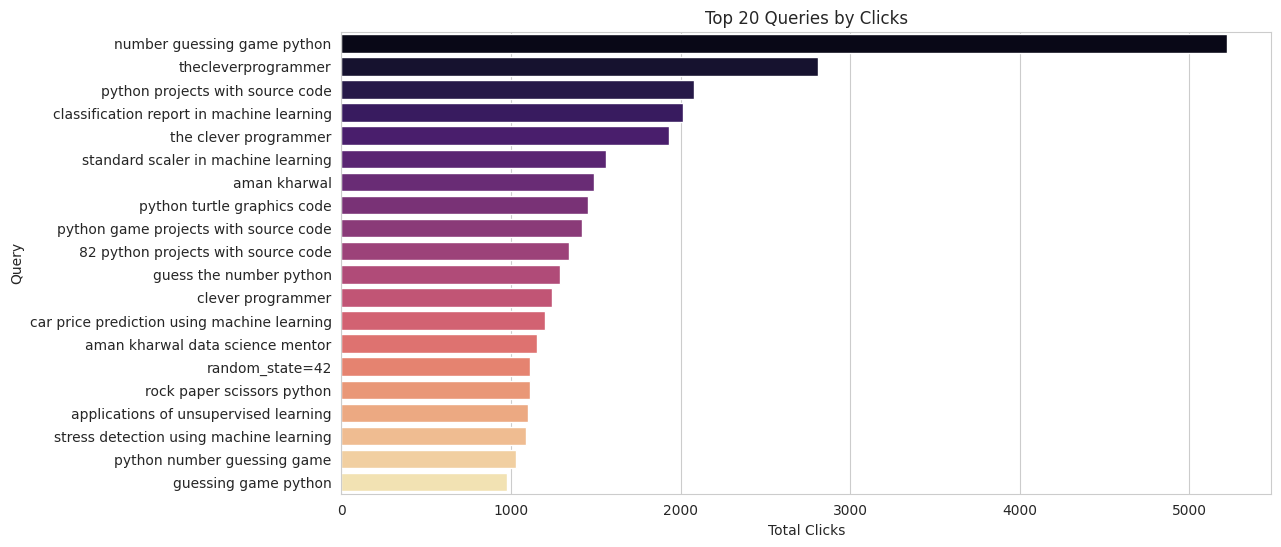

In [ ]:
plt.figure(figsize=(12,6))
top_queries = df.groupby("Top queries")["Clicks"].sum().sort_values(ascending=False).head(20)
sns.barplot(x=top_queries.values, y=top_queries.index, palette="magma")
plt.title("Top 20 Queries by Clicks")
plt.xlabel("Total Clicks")
plt.ylabel("Query")
plt.show()

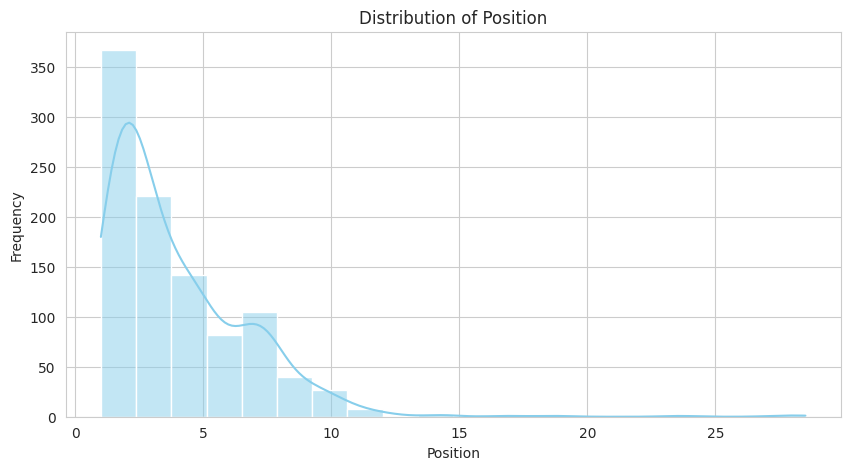

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.histplot(df["Position"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Position")
plt.xlabel("Position")
plt.ylabel("Frequency")
plt.show()

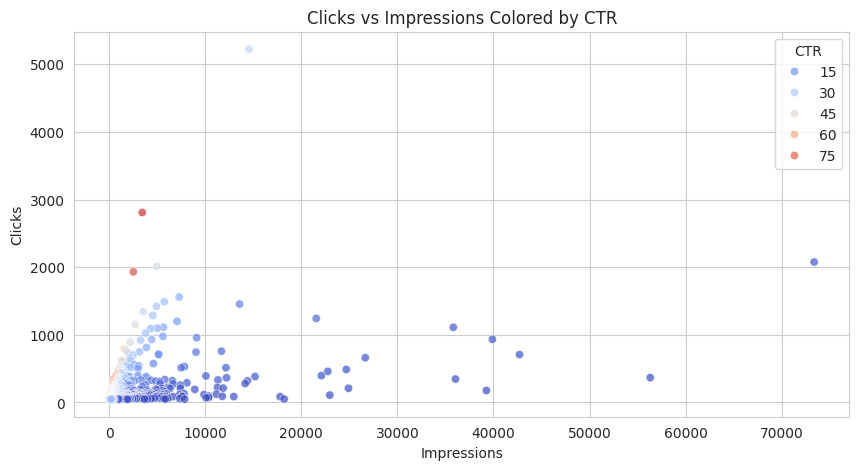

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="Impressions", y="Clicks", hue="CTR", palette="coolwarm", alpha=0.7)
plt.title("Clicks vs Impressions Colored by CTR")
plt.xlabel("Impressions")
plt.ylabel("Clicks")
plt.show()

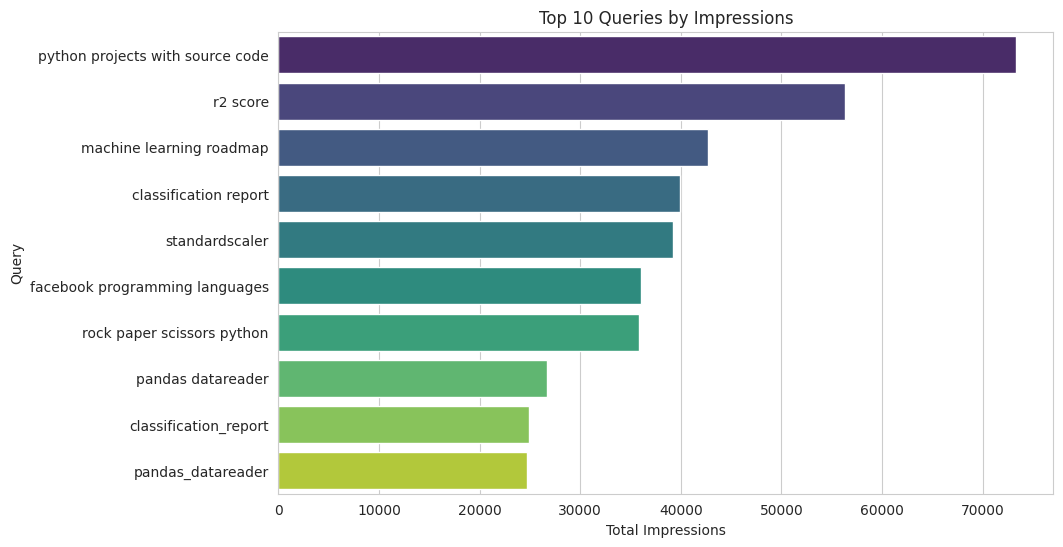

In [ ]:
plt.figure(figsize=(10,6))
top_queries = df.groupby("Top queries")["Impressions"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_queries.values, y=top_queries.index, palette="viridis")
plt.title("Top 10 Queries by Impressions")
plt.xlabel("Total Impressions")
plt.ylabel("Query")
plt.show()

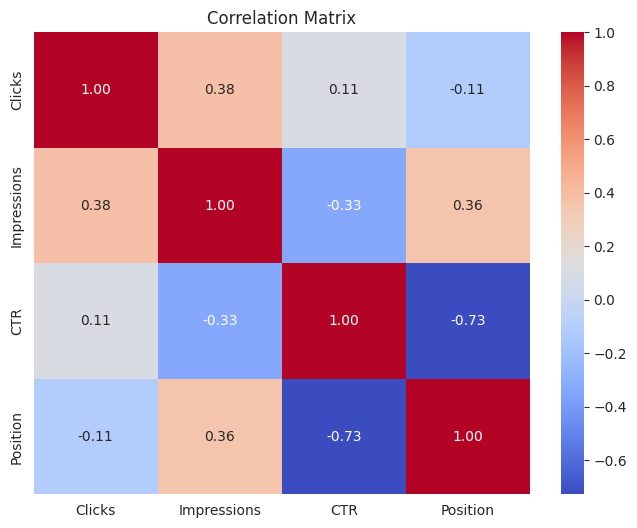

In [ ]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Selecting Best Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np

X = df.drop(["Top queries", "CTR"], axis=1)
y = df["CTR"]

cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(include=["int64","float64"]).columns

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
], remainder="passthrough")

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, model in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    results[name] = {
        "R2": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    }

results


{'LinearRegression': {'R2': 0.5713507195896614,
  'MAE': 7.752608633105734,
  'RMSE': np.float64(10.088031466869369)},
 'Ridge': {'R2': 0.5713217356708047,
  'MAE': 7.752977436073678,
  'RMSE': np.float64(10.088372521615467)},
 'Lasso': {'R2': 0.5648932559881418,
  'MAE': 7.840155162049147,
  'RMSE': np.float64(10.163733899825992)},
 'RandomForest': {'R2': 0.9512671139710921,
  'MAE': 2.0277674999999986,
  'RMSE': np.float64(3.4014684304649943)},
 'GradientBoosting': {'R2': 0.9488790804696189,
  'MAE': 2.2484706307644906,
  'RMSE': np.float64(3.4838119718741902)}}

**Random Forest**

In [ ]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(include=["int64","float64"]).columns

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
], remainder="passthrough")

best_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

best_model.fit(X, y)

pickle.dump(best_model, open("best_ctr_model.pkl", "wb"))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RandomForest Model Performance:")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

RandomForest Model Performance:
R²: 0.9513
MAE: 2.03
RMSE: 3.40


**Conclusion**

The RandomForest model achieved the best performance with R² = 0.9513, MAE = 2.03, and RMSE = 3.40. This indicates that the model can accurately predict CTR based on search query features. RandomForest outperformed all other tested models and is suitable for deployment in a real-time prediction environment.